In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ts = pd.read_csv('TS.csv')

In [7]:
ts.head()

,Participant,Test Number,Start timestamp,End timestamp,Hand,Back,Msafety_acc,Msafety_ppg,Bangle
0,DS,1,1.698412e+12,1.698412e+12,testResults_Ds01_hand.json,testResults_Ds01.json,6ba8ac15de_st1dby_2023-10-27_13_2023-10-27_17_...,6ba8ac15de_st1dby_2023-10-27_13_2023-10-27_17_...,DS01.json
1,DS,2,1.698412e+12,1.698412e+12,testResults_Ds02_hand.json,testResults_Ds02.json,6ba8ac15de_st1dby_2023-10-27_13_2023-10-27_17_...,6ba8ac15de_st1dby_2023-10-27_13_2023-10-27_17_...,DS02.json
2,DS,3,1.698412e+12,1.698412e+12,testResults_Ds03_hand.json,testResults_Ds03.json,6ba8ac15de_st1dby_2023-10-27_13_2023-10-27_17_...,6ba8ac15de_st1dby_2023-10-27_13_2023-10-27_17_...,DS03.json
3,DS,4,1.698412e+12,1.698412e+12,testResults_Ds04_hand.json,testResults_Ds04.json,6ba8ac15de_st1dby_2023-10-27_13_2023-10-27_17_...,6ba8ac15de_st1dby_2023-10-27_13_2023-10-27_17_...,DS04.json
4,DS,5,1.698413e+12,1.698413e+12,testResults_Ds05_hand.json,testResults_Ds05.json,6ba8ac15de_st1dby_2023-10-27_13_2023-10-27_17_...,6ba8ac15de_st1dby_2023-10-27_13_2023-10-27_17_...,DS05.json


In [3]:
ds = ts[ts['Participant']=='DS']
ds.reset_index(drop=True, inplace=True)

# Test de tracer tout les graphes

In [8]:
import pandas as pd
import os

# Spécifiez le chemin du dossier contenant vos fichiers
dossier = '/Results/DS/1/'

# Créez un dictionnaire pour stocker les DataFrames
dataframes = {}

# Parcourez tous les fichiers dans le dossier
for fichier in os.listdir(dossier):
    # Vérifiez s'il s'agit d'un fichier CSV (ou d'un autre format supporté par pandas)
    if fichier.endswith('.csv'):  # ou '.xlsx' pour les fichiers Excel, etc.
        chemin_fichier = os.path.join(dossier, fichier)
        
        # Chargez le fichier en tant que DataFrame et ajoutez-le au dictionnaire
        nom_fichier = os.path.splitext(fichier)[0]  # Obtenez le nom du fichier sans extension
        dataframe = pd.read_csv(chemin_fichier)  # Utilisez pd.read_excel() pour les fichiers Excel
        dataframes[nom_fichier] = dataframe

# Maintenant, vous avez un dictionnaire de DataFrames où les clés sont les noms des fichiers
# Vous pouvez accéder à chaque DataFrame par son nom de fichier
# Par exemple, pour accéder au DataFrame d'un fichier appelé "donnees.csv":
# dataframes["donnees"]

# Affichez les DataFrames
for nom_fichier, dataframe in dataframes.items():
    print(f"DataFrame pour {nom_fichier}:")
    print(dataframe)
    print("\n")


FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: '/Results/DS/1/'

# Test 2 en horodatage relatif au timestamp de debut de hand 

In [14]:
start = ds['Start timestamp'][1]

In [41]:
df_back_2_acc = pd.read_csv('Results/DS/2/DS_back_motion_2.csv')
df_hand_2_acc = pd.read_csv('Results/DS/2/DS_hand_motion_2.csv')
df_msafety_2_acc = pd.read_csv('Results/DS/2/DS_msafety_acc_2.csv')
df_bangle_2_acc = pd.read_csv('Results/DS/2/DS_bangle_accel_2.csv')

In [42]:
df_back_2_acc['ms'] = df_back_2_acc['msFromStart']-start
df_bangle_2_acc['tms'] = df_bangle_2_acc['ms']-start
df_msafety_2_acc['ms'] = df_msafety_2_acc['ts(msec)']-start

### hand

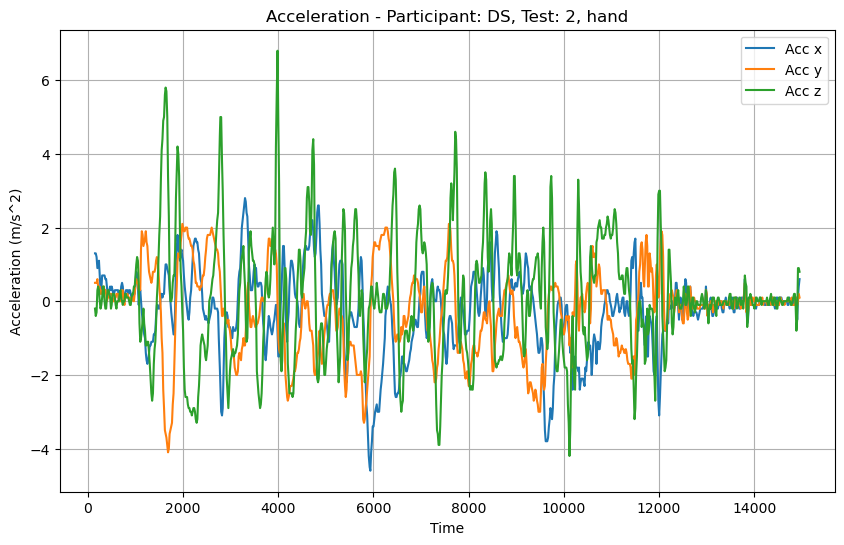

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df_hand_2_acc['msFromStart'],df_hand_2_acc['accx'], label='Acc x')
plt.plot(df_hand_2_acc['msFromStart'],df_hand_2_acc['accy'], label='Acc y')
plt.plot(df_hand_2_acc['msFromStart'],df_hand_2_acc['accz'], label='Acc z')
plt.title('Acceleration - Participant: DS, Test: 2, hand')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

### back

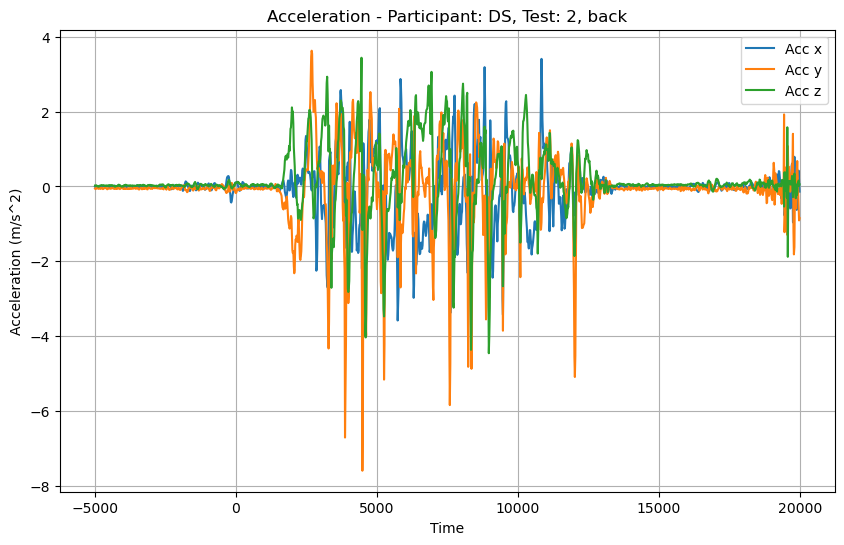

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df_back_2_acc['ms'],df_back_2_acc['accx'], label='Acc x')
plt.plot(df_back_2_acc['ms'],df_back_2_acc['accy'], label='Acc y')
plt.plot(df_back_2_acc['ms'],df_back_2_acc['accz'], label='Acc z')
plt.title('Acceleration - Participant: DS, Test: 2, back')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
df_back_2_acc = df_back_2_acc[df_back_2_acc['ms']>1500]
df_back_2_acc = df_back_2_acc[df_back_2_acc['ms']<14000]

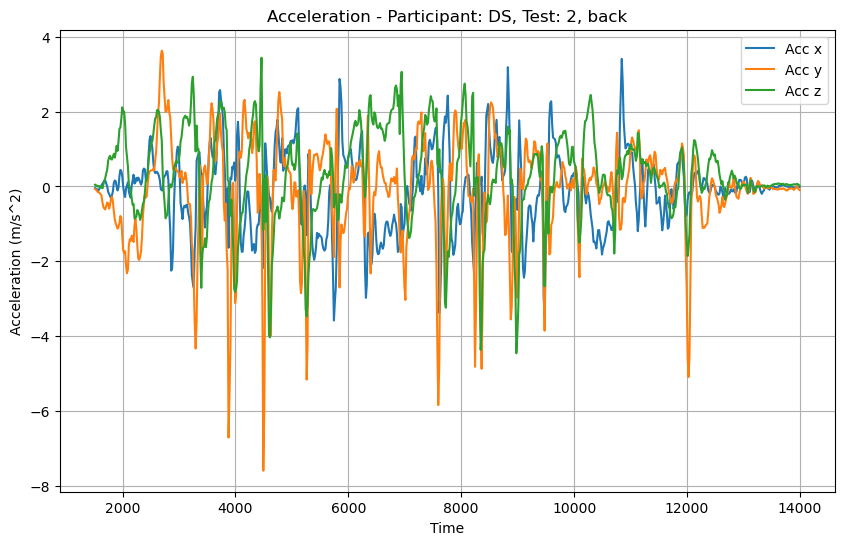

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df_back_2_acc['ms'],df_back_2_acc['accx'], label='Acc x')
plt.plot(df_back_2_acc['ms'],df_back_2_acc['accy'], label='Acc y')
plt.plot(df_back_2_acc['ms'],df_back_2_acc['accz'], label='Acc z')
plt.title('Acceleration - Participant: DS, Test: 2, back')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

### bangle

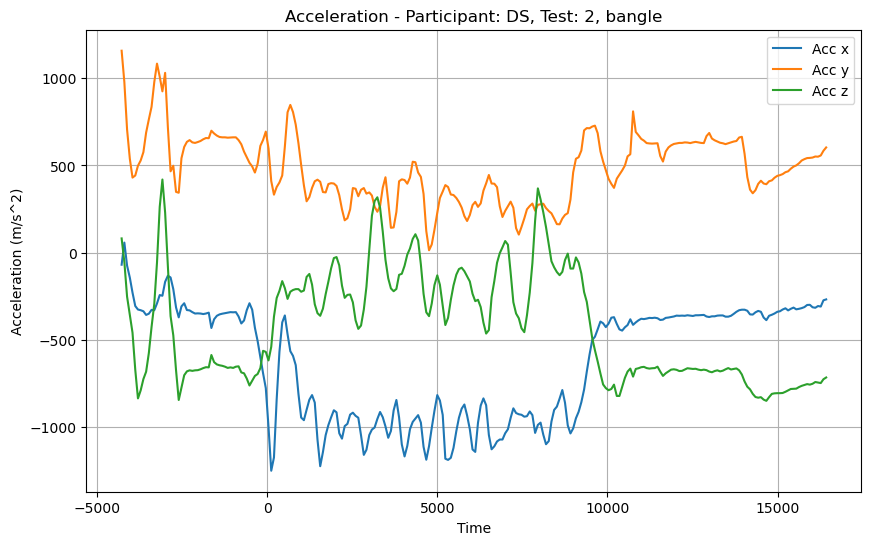

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df_bangle_2_acc['tms'],df_bangle_2_acc['x'], label='Acc x')
plt.plot(df_bangle_2_acc['tms'],df_bangle_2_acc['y'], label='Acc y')
plt.plot(df_bangle_2_acc['tms'],df_bangle_2_acc['z'], label='Acc z')
plt.title('Acceleration - Participant: DS, Test: 2, bangle')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
df_bangle_2_acc = df_bangle_2_acc[df_bangle_2_acc['tms']>(-1000)]
df_bangle_2_acc = df_bangle_2_acc[df_bangle_2_acc['tms']<12500]

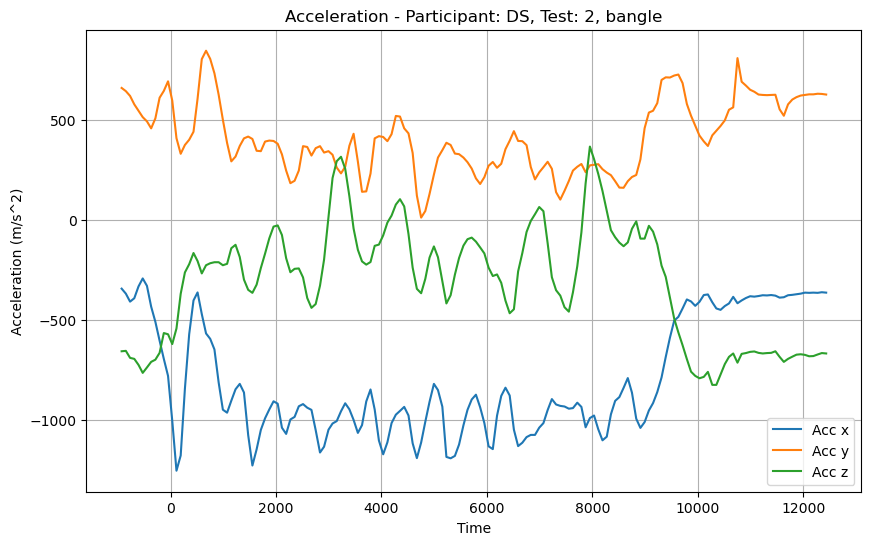

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(df_bangle_2_acc['tms'],df_bangle_2_acc['x'], label='Acc x')
plt.plot(df_bangle_2_acc['tms'],df_bangle_2_acc['y'], label='Acc y')
plt.plot(df_bangle_2_acc['tms'],df_bangle_2_acc['z'], label='Acc z')
plt.title('Acceleration - Participant: DS, Test: 2, bangle')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

### msafety

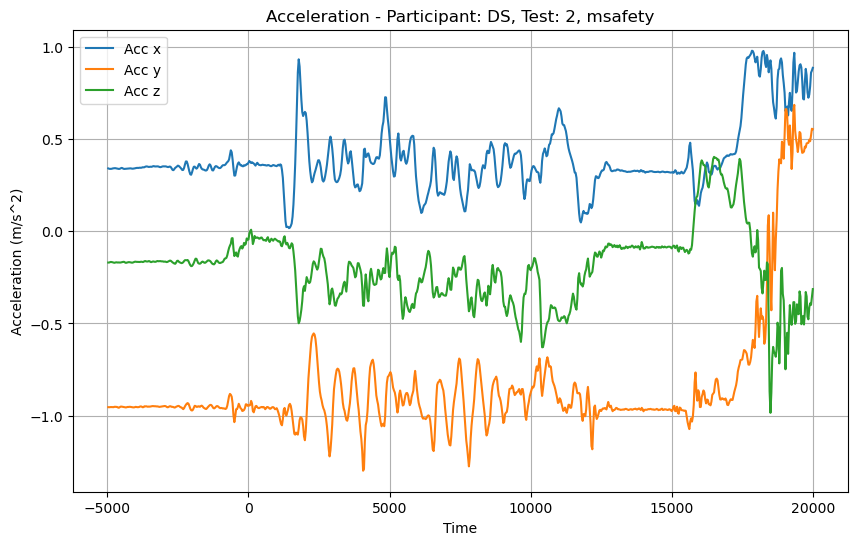

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df_msafety_2_acc['ms'],df_msafety_2_acc['X'], label='Acc x')
plt.plot(df_msafety_2_acc['ms'],df_msafety_2_acc['Y'], label='Acc y')
plt.plot(df_msafety_2_acc['ms'],df_msafety_2_acc['Z'], label='Acc z')
plt.title('Acceleration - Participant: DS, Test: 2, msafety')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
df_msafety_2_acc = df_msafety_2_acc[df_msafety_2_acc['ms']>0]
df_msafety_2_acc = df_msafety_2_acc[df_msafety_2_acc['ms']<14000]

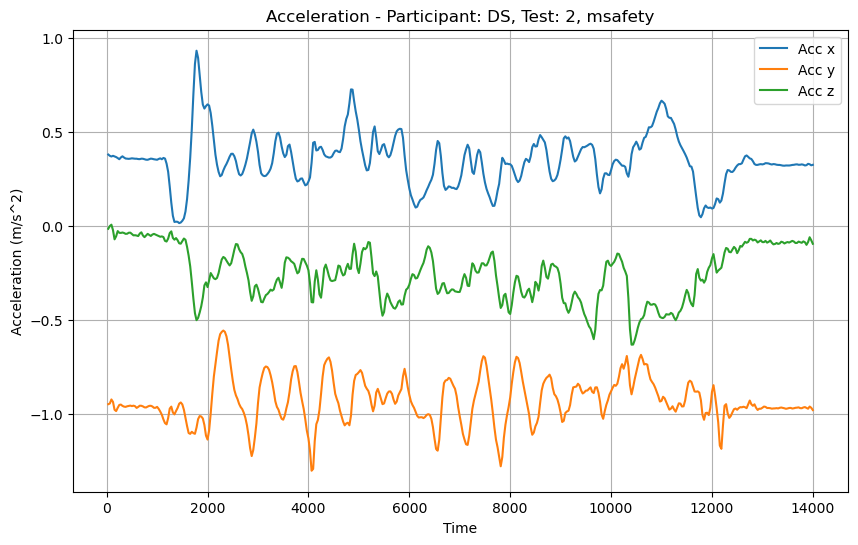

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(df_msafety_2_acc['ms'],df_msafety_2_acc['X'], label='Acc x')
plt.plot(df_msafety_2_acc['ms'],df_msafety_2_acc['Y'], label='Acc y')
plt.plot(df_msafety_2_acc['ms'],df_msafety_2_acc['Z'], label='Acc z')
plt.title('Acceleration - Participant: DS, Test: 2, msafety')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

# norme

In [2]:
df_back_acc = pd.read_csv('Results/DS/1/DS_back_motion_1.csv')
df_hand_acc = pd.read_csv('Results/DS/1/DS_hand_motion_1.csv')
df_msafety_acc = pd.read_csv('Results/DS/1/DS_msafety_acc_1.csv')
df_bangle_acc = pd.read_csv('Results/DS/1/DS_bangle_accel_1.csv')

In [9]:
df_back_acc['ms'] = df_back_acc['msFromStart']-1698411735000
df_bangle_acc['tms'] = df_bangle_acc['ms']-1698411735000
df_msafety_acc['ms'] = df_msafety_acc['ts(msec)']-1698411735000

In [14]:
df_back_acc['normAcc'] = np.sqrt(df_back_acc['accx']**2+df_back_acc['accy']**2+df_back_acc['accz']**2)
df_hand_acc['normAcc'] = np.sqrt(df_hand_acc['accx']**2+df_hand_acc['accy']**2+df_hand_acc['accz']**2)
df_bangle_acc['normAcc'] = np.sqrt(df_bangle_acc['x']**2+df_bangle_acc['y']**2+df_bangle_acc['z']**2)
df_msafety_acc['normAcc'] = np.sqrt(df_msafety_acc['X']**2+df_msafety_acc['Y']**2+df_msafety_acc['Z']**2)

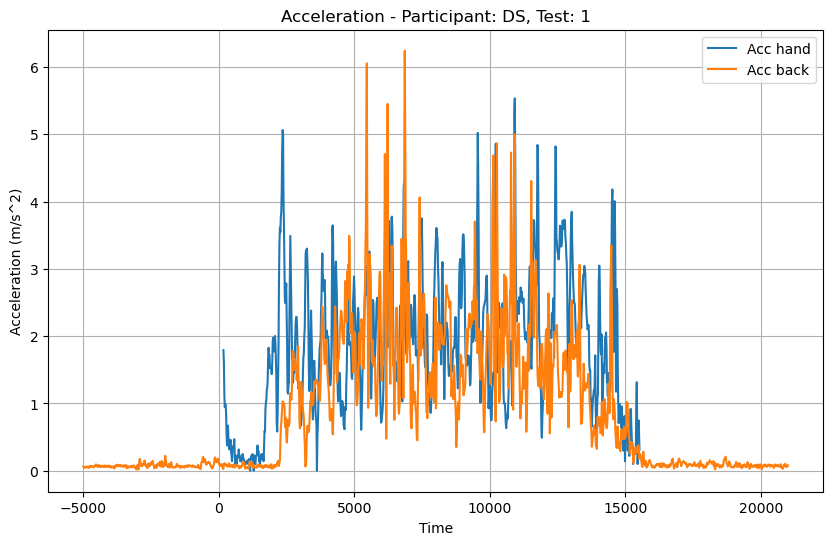

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df_hand_acc['msFromStart'],df_hand_acc['normAcc'], label='Acc hand')
plt.plot(df_back_acc['ms'],df_back_acc['normAcc'], label='Acc back')
#plt.plot(df_bangle_acc['tms'],df_bangle_acc['normAcc'], label='Acc bangle')
#plt.plot(df_msafety_acc['ms'],df_msafety_acc['normAcc'], label='Acc msafety')
plt.title('Acceleration - Participant: DS, Test: 1')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

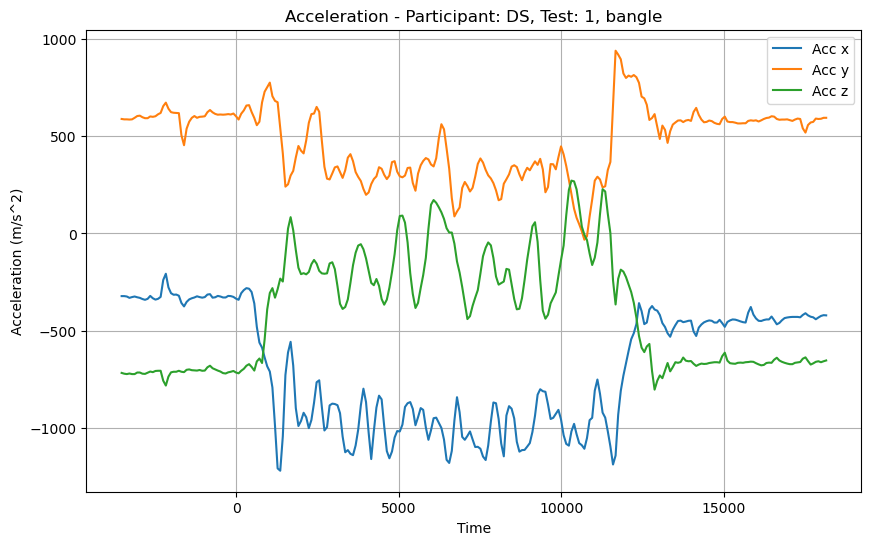

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df_bangle_acc['tms'],df_bangle_acc['x'], label='Acc x')
plt.plot(df_bangle_acc['tms'],df_bangle_acc['y'], label='Acc y')
plt.plot(df_bangle_acc['tms'],df_bangle_acc['z'], label='Acc z')
plt.title('Acceleration - Participant: DS, Test: 1, bangle')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
df_bangle_acc = df_bangle_acc[df_bangle_acc['tms']>0]
df_bangle_acc = df_bangle_acc[df_bangle_acc['tms']<13500]

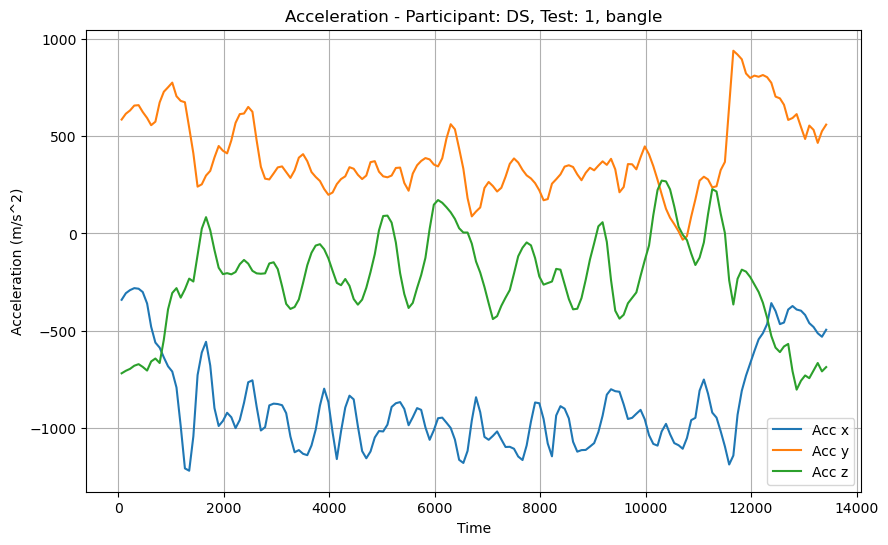

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df_bangle_acc['tms'],df_bangle_acc['x'], label='Acc x')
plt.plot(df_bangle_acc['tms'],df_bangle_acc['y'], label='Acc y')
plt.plot(df_bangle_acc['tms'],df_bangle_acc['z'], label='Acc z')
plt.title('Acceleration - Participant: DS, Test: 1, bangle')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

# Plot cadence

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

# Fonction pour tracer l'accélération
def plot_cadence(participant, test_number):
    # Chemin vers le fichier Excel
    excel_file_path = f'Results/{participant}/{test_number}/{participant}_hand_cadence_{test_number}.csv'
    
    # Charger le DataFrame à partir du fichier Excel
    df = pd.read_csv(excel_file_path)
    
    # Vérifier si le csv n'est pas vide
    if 'msFromStart' in df.columns:
        fig1 = go.Figure()
        fig1.add_trace(go.Scatter(x=df['msFromStart'], y=df['instantaneousSpeed'], mode='lines', name='Vitesse en fonction du temps'))
        fig1.update_layout(title=f'Vitesse - Participant: {participant}, Test: {test_number}, Type: hand', xaxis_title='Time', yaxis_title='Vitesse')
        
        fig2 = go.Figure()
        fig2.add_trace(go.Scatter(x=df['msFromStart'], y=df['instantaneousCadence'], mode='lines', name='Nombre de pas en fonction du temps'))
        fig2.update_layout(title=f'Nombre de pas - Participant: {participant}, Test: {test_number}, Type: hand', xaxis_title='Time', yaxis_title='Nombre de pas')

        fig3 = go.Figure()
        fig3.add_trace(go.Scatter(x=df['msFromStart'], y=df['instantaneousStrideLength'], mode='lines', name='Longueur des pas en fonction du temps'))
        fig3.update_layout(title=f'Longueur des pas - Participant: {participant}, Test: {test_number}, Type: hand', xaxis_title='Time', yaxis_title='Longueur des pas')

        fig4 = go.Figure()
        fig4.add_trace(go.Scatter(x=df['msFromStart'], y=df['totalDistance'], mode='lines', name='Distance parcourue en fonction du temps'))
        fig4.update_layout(title=f'Distance - Participant: {participant}, Test: {test_number}, Type: hand', xaxis_title='Time', yaxis_title='Distance')

        fig1.show()
        fig2.show()
        fig3.show()
        fig4.show()
        
    else:
        print("Les données de cadence ne sont pas disponibles pour ce test.")

# Fonction principale
def main():
    # Liste des participants
    participants = ['DS', 'DL', 'MB', 'RC', 'PB', 'LC']
    print("Participants :", participants)
    participant = input("Choose the participant: ").strip().upper()

    # Vérifier si le participant est valide
    if participant not in participants:
        print("Participant invalide.")
        return

    # Numéro du test
    test_number = input("test number (1-10): ").strip()

    # Vérifier si le numéro de test est valide
    if not test_number.isdigit() or int(test_number) < 1 or int(test_number) > 10:
        print("Numéro de test invalide.")
        return

    test_number = int(test_number)

    # Tracer la cadence
    plot_cadence(participant, test_number)

# Appel de la fonction principale
if __name__ == "__main__":
    main()

Participants : ['DS', 'DL', 'MB', 'RC', 'PB', 'LC']
Choose the participant: DS
test number (1-10): 2


# Tests

Participants : ['DS', 'DL', 'MB', 'RC', 'PB', 'LC']
Choose the participant: DS
test number (1-10): 3
choose the sensor (hand or back): back


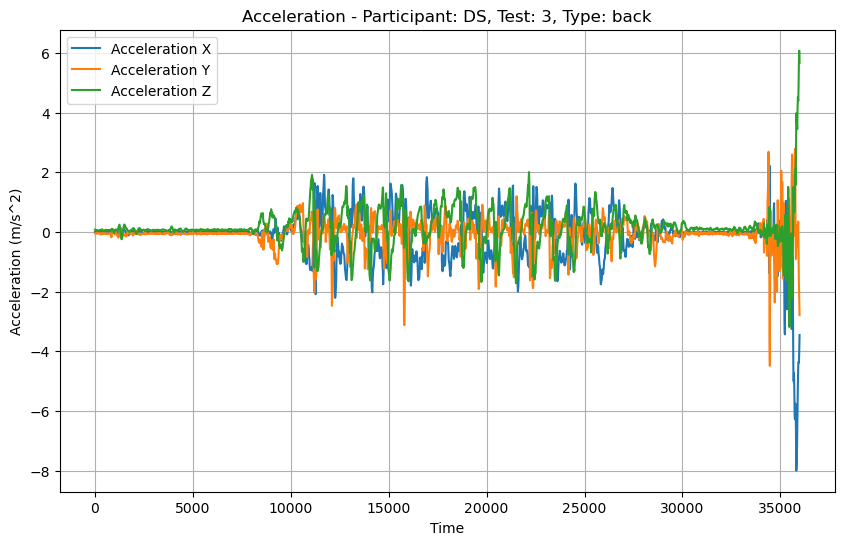

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour tracer l'accélération
def plot_acceleration(participant, test_number, data_type):
    # Chemin vers le fichier Excel
    excel_file_path = f'Results/{participant}/{test_number}/{participant}_{data_type}_motion_{test_number}.csv'
    
    # Charger le DataFrame à partir du fichier Excel
    df = pd.read_csv(excel_file_path)
    
    df['ms'] = df['msFromStart']-df['msFromStart'][0]
    
    # Vérifier si la colonne 'accx' existe (pour les données d'accélération)
    if 'accx' in df.columns:
        # Tracer l'accélération dans les trois axes
        plt.figure(figsize=(10, 6))
        plt.plot(df['ms'],df['accx'], label='Acceleration X')
        plt.plot(df['ms'],df['accy'], label='Acceleration Y')
        plt.plot(df['ms'],df['accz'], label='Acceleration Z')
        plt.title(f'Acceleration - Participant: {participant}, Test: {test_number}, Type: {data_type}')
        plt.xlabel('Time')
        plt.ylabel('Acceleration (m/s^2)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Les données d'accélération ne sont pas disponibles pour ce test.")

# Fonction principale
def main():
    # Liste des participants
    participants = ['DS', 'DL', 'MB', 'RC', 'PB', 'LC']
    print("Participants :", participants)
    participant = input("Choose the participant: ").strip().upper()

    # Vérifier si le participant est valide
    if participant not in participants:
        print("Participant invalide.")
        return

    # Numéro du test
    test_number = input("test number (1-10): ").strip()

    # Vérifier si le numéro de test est valide
    if not test_number.isdigit() or int(test_number) < 1 or int(test_number) > 10:
        print("Numéro de test invalide.")
        return

    test_number = int(test_number)

    # Type de données (hand ou back)
    data_type = input("choose the sensor (hand or back): ").strip().lower()

    # Vérifier si le type de données est valide
    if data_type not in ['hand', 'back']:
        print("Type de données invalide.")
        return

    # Tracer l'accélération
    plot_acceleration(participant, test_number, data_type)

# Appel de la fonction principale
if __name__ == "__main__":
    main()

Participants : ['DS', 'DL', 'MB', 'RC', 'PB', 'LC']
Choose the participant: DS
test number (1-10): 1
choose the sensor (hand or back): back


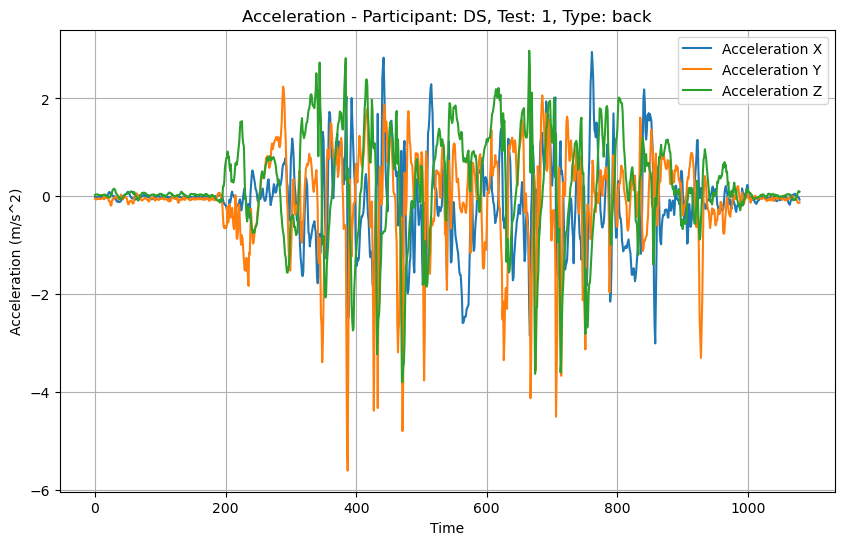

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour tracer l'accélération
def plot_acceleration(participant, test_number, data_type):
    # Chemin vers le fichier Excel
    excel_file_path = f'Results/{participant}/{test_number}/{participant}_{data_type}_motion_{test_number}.csv'
    
    # Charger le DataFrame à partir du fichier Excel
    df = pd.read_csv(excel_file_path)
    
    # Vérifier si la colonne 'accx' existe (pour les données d'accélération)
    if 'accx' in df.columns:
        # Tracer l'accélération dans les trois axes
        plt.figure(figsize=(10, 6))
        plt.plot(df['accx'], label='Acceleration X')
        plt.plot(df['accy'], label='Acceleration Y')
        plt.plot(df['accz'], label='Acceleration Z')
        plt.title(f'Acceleration - Participant: {participant}, Test: {test_number}, Type: {data_type}')
        plt.xlabel('Time')
        plt.ylabel('Acceleration (m/s^2)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Les données d'accélération ne sont pas disponibles pour ce test.")

# Fonction principale
def main():
    # Liste des participants
    participants = ['DS', 'DL', 'MB', 'RC', 'PB', 'LC']
    print("Participants :", participants)
    participant = input("Choose the participant: ").strip().upper()

    # Vérifier si le participant est valide
    if participant not in participants:
        print("Participant invalide.")
        return

    # Numéro du test
    test_number = input("test number (1-10): ").strip()

    # Vérifier si le numéro de test est valide
    if not test_number.isdigit() or int(test_number) < 1 or int(test_number) > 10:
        print("Numéro de test invalide.")
        return

    test_number = int(test_number)

    # Type de données (hand ou back)
    data_type = input("choose the sensor (hand or back): ").strip().lower()

    # Vérifier si le type de données est valide
    if data_type not in ['hand', 'back']:
        print("Type de données invalide.")
        return

    # Tracer l'accélération
    plot_acceleration(participant, test_number, data_type)

# Appel de la fonction principale
if __name__ == "__main__":
    main()

Participants : ['DS', 'DL', 'MB', 'RC', 'PB', 'LC']
Choose the participant: DS
test number (1-10): 1


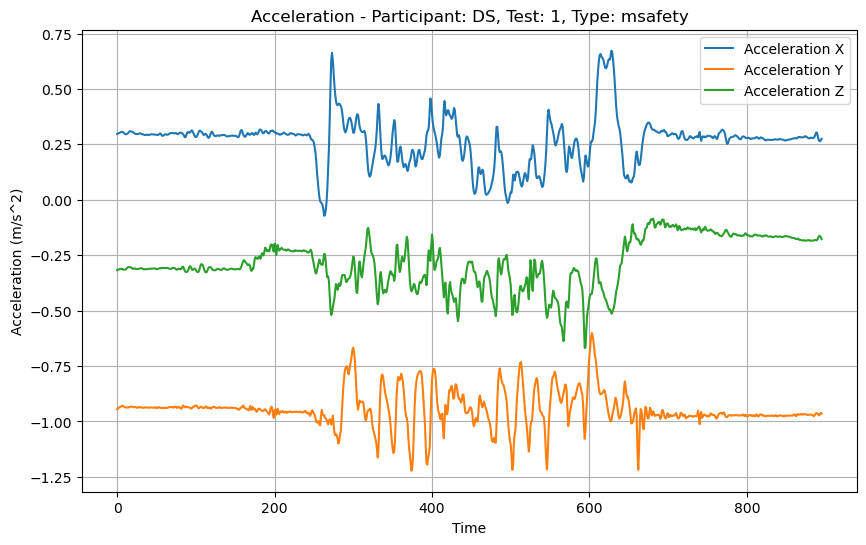

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour tracer l'accélération
def plot_acceleration(participant, test_number):
    # Chemin vers le fichier Excel
    excel_file_path = f'Results/{participant}/{test_number}/{participant}_msafety_acc_{test_number}.csv'
    
    # Charger le DataFrame à partir du fichier Excel
    df = pd.read_csv(excel_file_path)
    
    # Vérifier si la colonne 'accx' existe (pour les données d'accélération)
    if 'X' in df.columns:
        # Tracer l'accélération dans les trois axes
        plt.figure(figsize=(10, 6))
        plt.plot(df['X'], label='Acceleration X')
        plt.plot(df['Y'], label='Acceleration Y')
        plt.plot(df['Z'], label='Acceleration Z')
        plt.title(f'Acceleration - Participant: {participant}, Test: {test_number}, Type: msafety')
        plt.xlabel('Time')
        plt.ylabel('Acceleration (m/s^2)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Les données d'accélération ne sont pas disponibles pour ce test.")

# Fonction principale
def main():
    # Liste des participants
    participants = ['DS', 'DL', 'MB', 'RC', 'PB', 'LC']
    print("Participants :", participants)
    participant = input("Choose the participant: ").strip().upper()

    # Vérifier si le participant est valide
    if participant not in participants:
        print("Participant invalide.")
        return

    # Numéro du test
    test_number = input("test number (1-10): ").strip()

    # Vérifier si le numéro de test est valide
    if not test_number.isdigit() or int(test_number) < 1 or int(test_number) > 10:
        print("Numéro de test invalide.")
        return

    test_number = int(test_number)

    # Tracer l'accélération
    plot_acceleration(participant, test_number)

# Appel de la fonction principale
if __name__ == "__main__":
    main()

Participants : ['DS', 'DL', 'MB', 'RC', 'PB', 'LC']
Choose the participant: DS
test number (1-10): 1
choose the sensor (hand or back): back


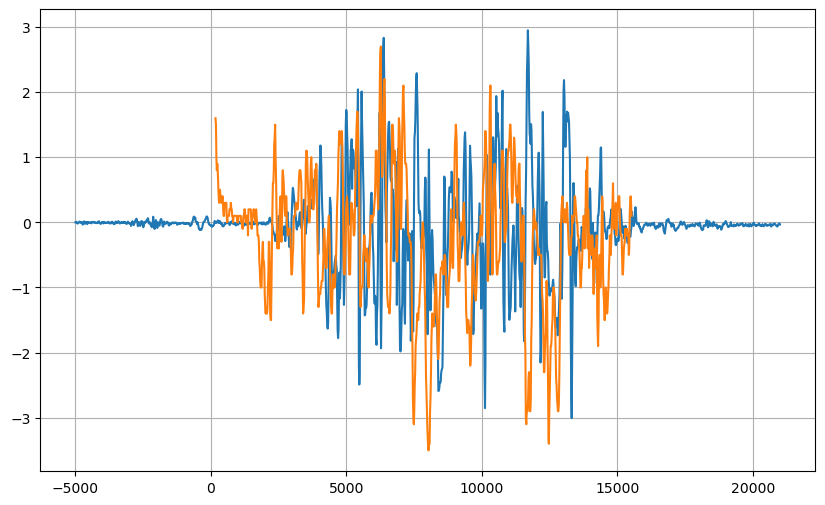

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour tracer l'accélération
def plot_acceleration(participant, test_number, data_type):
    # Chemin vers le fichier Excel
    excel_file_path = f'Results/{participant}/{test_number}/{participant}_{data_type}_motion_{test_number}.csv'
    path = f'Results/{participant}/{test_number}/{participant}_hand_motion_{test_number}.csv'
    
    # Charger le DataFrame à partir du fichier Excel
    df = pd.read_csv(excel_file_path)
    df2 = pd.read_csv(path)
    
    df['ms'] = df['msFromStart']-1698411735000
    
    # Vérifier si la colonne 'accx' existe (pour les données d'accélération)
    if 'accx' in df.columns:
        # Tracer l'accélération dans les trois axes
        plt.figure(figsize=(10, 6))
    
        plt.plot(df['ms'],df['accx'], label='X back')
        plt.plot(df2['msFromStart'],df2['accx'], label='X hand')
        plt.grid(True)
        plt.show()
    else:
        print("Les données d'accélération ne sont pas disponibles pour ce test.")

# Fonction principale
def main():
    # Liste des participants
    participants = ['DS', 'DL', 'MB', 'RC', 'PB', 'LC']
    print("Participants :", participants)
    participant = input("Choose the participant: ").strip().upper()

    # Vérifier si le participant est valide
    if participant not in participants:
        print("Participant invalide.")
        return

    # Numéro du test
    test_number = input("test number (1-10): ").strip()

    # Vérifier si le numéro de test est valide
    if not test_number.isdigit() or int(test_number) < 1 or int(test_number) > 10:
        print("Numéro de test invalide.")
        return

    test_number = int(test_number)

    # Type de données (hand ou back)
    data_type = input("choose the sensor (hand or back): ").strip().lower()

    # Vérifier si le type de données est valide
    if data_type not in ['hand', 'back']:
        print("Type de données invalide.")
        return

    # Tracer l'accélération
    plot_acceleration(participant, test_number, data_type)

# Appel de la fonction principale
if __name__ == "__main__":
    main()